In [1]:
%load_ext autoreload
%autoreload 1

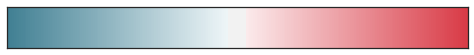

In [2]:
# base libs
import numpy as np
import pandas as pd

pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='white')
cmap = sns.choose_diverging_palette(as_cmap=True)

In [3]:
%aimport dasci.data.explore
%aimport dasci.model.common

import dasci.data.explore as expl
import dasci.model.common as model

In [4]:
df = pd.read_pickle(expl.full_path_name(r'output\train-fe-basic.pickle'))

# Modeling

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
df_encoded = model.encode(df)

X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Scale features. Note, that it should be done only after splitting the dataset into train and test 

In [7]:
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(exclude = ["object"]).columns.tolist()
numerical_features.remove("SalePrice")

scaler = StandardScaler()
# !NOTE: scaler should be trained only on train data
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
print(scaler.scale_)
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

[1.04300650e+04 6.03045394e-01 2.82935491e-01 1.38071767e+00
 1.09408114e+00 2.97797519e+01 2.03975946e+01 5.70179139e-01
 3.55346219e-01 8.52017963e-01 1.02061601e+00 2.09894433e+00
 4.65333885e+02 8.77554612e-01 1.53412345e+02 4.31553579e+02
 4.42384034e+02 9.61312314e-01 3.87824707e+02 4.44813939e+02
 5.44810107e+01 5.44696190e+02 5.17000916e-01 2.34274713e-01
 5.51111299e-01 4.99395043e-01 8.05593330e-01 6.66226848e-01
 1.65177819e+00 6.79217506e-01 6.47803712e-01 2.58702197e+01
 7.27651351e-01 2.09143788e+02 6.69537547e-01 6.68048686e-01
 4.91262983e-01 1.22769297e+02 6.88857360e+01 6.27372344e+01
 2.89138570e+01 5.76247237e+01 5.78913902e+02 1.33179047e+00]
C:\Users\m.zhukov\AppData\Local\Continuum\miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"RMSE on Training set : {model.rmse(y_train, lr.predict(X_train))}")
# Used to compare models since allows to estimate generalization properties of the model
print(f"RMSE CV on Training set : {model.rmse_cv(lr, X_train, y_train)}")

print(f"RMSE on Test set : {model.rmse(y_test, lr.predict(X_test))}")

RMSE on Training set : 0.07596012598396985
[7.75656296e+06 1.59392433e+09 6.55590711e+08 4.65505751e+08
 1.74985476e+08]
RMSE CV on Training set : 579552566.3640819
RMSE on Test set : 584891964.2005901


In [9]:
error = lr.predict(X_test) - y_test
len(error)

438

In [10]:
error[error > 2]

326     2.343700e+09
574     5.749560e+09
298     5.704229e+09
227     8.695246e+08
1199    1.105312e+09
459     2.629607e+09
762     2.343700e+09
302     1.740107e+09
1456    4.885965e+08
615     2.206132e+09
2       1.967961e+09
1225    1.001391e+09
999     8.671428e+08
1242    9.036878e+08
1187    4.632175e+09
300     2.073097e+09
644     1.967961e+09
Name: SalePrice, dtype: float64

In [11]:
X_test.loc[326,:][X_test.loc[326,:] < -1]

BsmtUnfSF      -1.090343
FullBath       -1.036104
BedroomAbvGr   -2.357416
Name: 326, dtype: float64

In [12]:
lr.coef_

array([ 2.55447240e-02, -1.91916312e-03,  1.09657399e-02,  5.99067018e-02,
        4.35838352e-02,  3.80413692e-02,  1.05313611e-02, -1.12744807e-03,
       -1.45569780e-03,  6.09749463e-03,  1.30574651e-02,  7.72226315e-03,
        8.53940725e+10, -9.30863336e-03,  2.81529141e+10,  7.91950011e+10,
       -8.11825132e+10,  2.32294327e-02,  1.46291070e+10,  1.67787936e+10,
        2.05507416e+09, -2.05464446e+10,  1.71739307e-02,  3.21029295e-03,
        1.26876685e-02,  1.51968402e-02,  3.85308713e-04,  1.65487287e-02,
       -5.51919644e-03,  2.25341090e-02,  7.17683876e-03, -3.23238606e-03,
        1.50245764e-02,  1.83195798e-02,  2.91916852e-02, -5.72066796e-03,
        7.15188805e-03,  8.82621552e-03,  9.01384220e-03,  1.14356037e-03,
       -1.86008794e-04,  1.50703031e-02, -1.64105153e-03, -4.20804714e-03,
       -2.97960419e+09, -2.97960419e+09, -2.97960419e+09, -2.97960419e+09,
       -2.97960419e+09, -2.97960419e+09, -2.97960419e+09, -2.97960419e+09,
       -2.97960419e+09, -

<b>As it can bee seen the coefficients are too big</b>

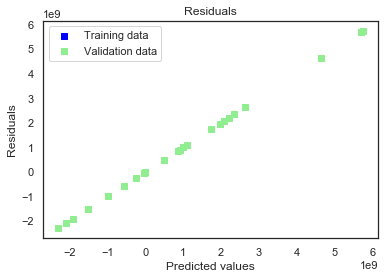

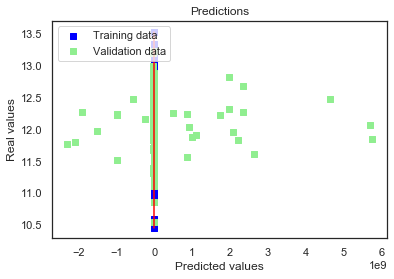

Regression picked 535 features and eliminated the other 10 features


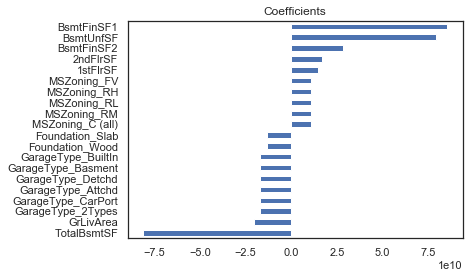

In [13]:
model.plot_residual(lr.predict(X_train), y_train, lr.predict(X_test), y_test)
model.plot_predictions(lr.predict(X_train), y_train, lr.predict(X_test), y_test)
model.plot_coef(pd.Series(lr.coef_, index = X_train.columns))

(!) Cross-validation shows that the model is very sensitive to outliers. Either we have to rid of them or to use regularized models. 

Consider later on how to rid of outliers.

## 2. Ridge regression

In [14]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

ridgeRegession = RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], cv=10)
ridgeRegession.fit(X_train, y_train)
print(f"alpha={ridgeRegession.alpha_}")
print(f"RMSE on Training set : {model.rmse(y_train, ridgeRegession.predict(X_train))}")
print(f"RMSE CV on Training set : {model.rmse_cv(Ridge(alpha=ridgeRegession.alpha_), X_train, y_train)}")

print(f"RMSE on Test set : {model.rmse(y_test, ridgeRegession.predict(X_test))}")

alpha=6.0
RMSE on Training set : 0.10828409155679503
[0.15895504 0.13343181 0.13951478 0.18306892 0.11338646]
RMSE CV on Training set : 0.1456714046458027
RMSE on Test set : 0.12449625099277228


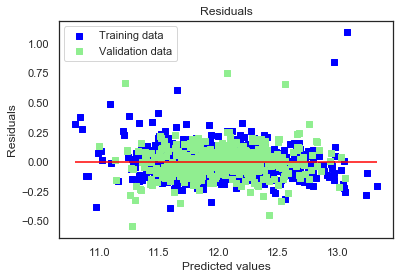

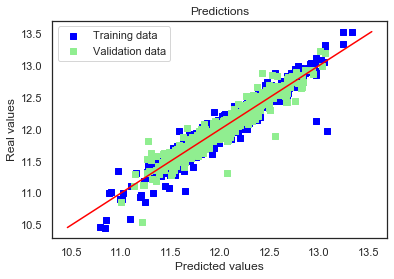

Regression picked 472 features and eliminated the other 73 features


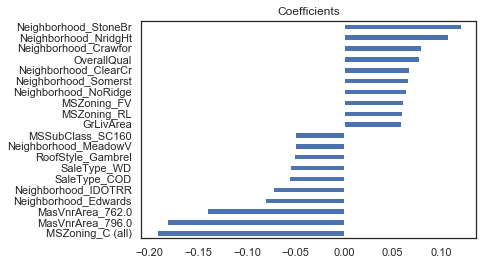

In [15]:
model.plot_residual(ridgeRegession.predict(X_train), y_train, ridgeRegession.predict(X_test), y_test)
model.plot_predictions(ridgeRegession.predict(X_train), y_train, ridgeRegession.predict(X_test), y_test)
model.plot_coef(pd.Series(ridgeRegession.coef_, index = X_train.columns))

Summary: ridge regression is less sensitive to outliers. Continue to work with one of them.

In [16]:
def train_regression_model(df: pd.DataFrame):
    df_model = df.copy()
    df_model_encoded = model.encode(df_model)

    X = df_model_encoded.drop("SalePrice", axis=1)
    y = df_model_encoded["SalePrice"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    numerical_features = df_model.select_dtypes(exclude = ["object"]).columns.tolist()
    numerical_features.remove("SalePrice")

    scaler = StandardScaler()
    X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
    X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
    
    ridgeRegession = RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 90, 120, 200, 250], cv=10)
    ridgeRegession.fit(X_train, y_train)

    print(f"alpha={ridgeRegession.alpha_}")

    print(f"RMSE on Training set : {model.rmse_cv(Ridge(alpha=ridgeRegession.alpha_), X_train, y_train)}") 
    print(f"RMSE on Test set : {model.rmse(y_test, ridgeRegession.predict(X_test))}")
    
    model.plot_residual(ridgeRegession.predict(X_train), y_train, ridgeRegession.predict(X_test), y_test)
    model.plot_predictions(ridgeRegession.predict(X_train), y_train, ridgeRegession.predict(X_test), y_test)
    model.plot_coef(pd.Series(ridgeRegession.coef_, index = X_train.columns))

C:\Users\m.zhukov\AppData\Local\Continuum\miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\m.zhukov\AppData\Local\Continuum\miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
alpha=6.0
[0.15895504 0.13343181 0.13951478 0.18306892 0.11338646]
RMSE on Training set : 0.1456714046458027
RMSE on Test set 

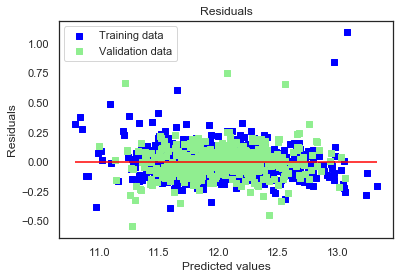

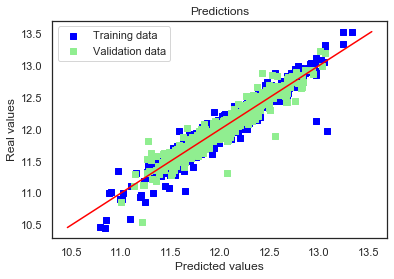

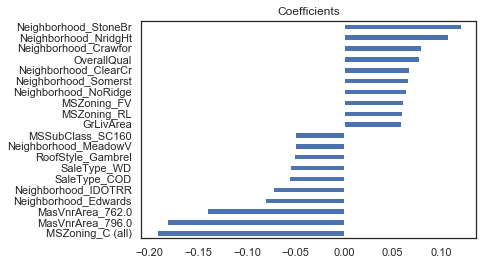

In [17]:
train_regression_model(df)

## Using feartues with high correlation

In [20]:
df = pd.read_pickle(r"output\train-fe-correlation-1.pickle")

C:\Users\m.zhukov\AppData\Local\Continuum\miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\m.zhukov\AppData\Local\Continuum\miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
alpha=6.0
[0.15895504 0.13343181 0.13951478 0.18306892 0.11338646]
RMSE on Training set : 0.1456714046458027
RMSE on Test set 

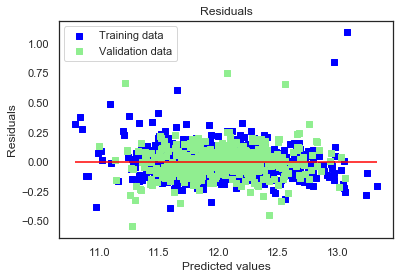

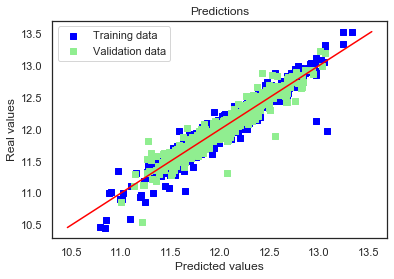

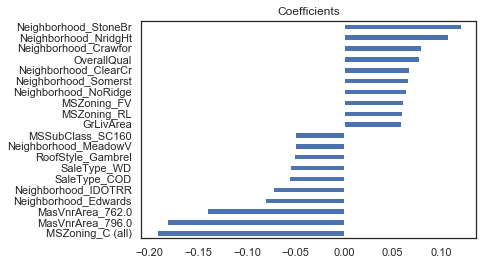

In [21]:
train_regression_model(df)

## Using feartues without pair-correlation

In [22]:
df = pd.read_pickle(r"output\train-fe-correlation-2.pickle")

C:\Users\m.zhukov\AppData\Local\Continuum\miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\m.zhukov\AppData\Local\Continuum\miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
alpha=6.0
[0.15895504 0.13343181 0.13951478 0.18306892 0.11338646]
RMSE on Training set : 0.1456714046458027
RMSE on Test set 

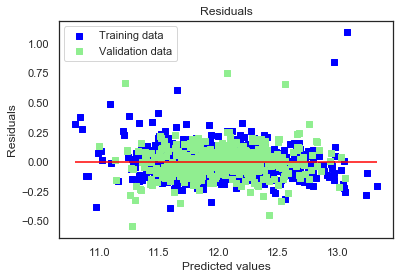

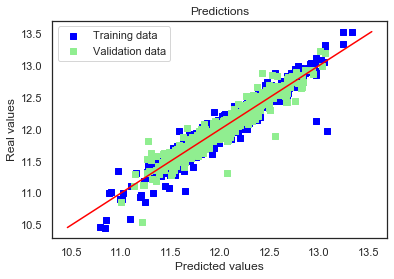

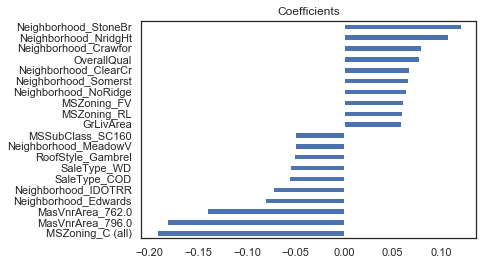

In [23]:
train_regression_model(df)